# Data Preprocessing Tools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/k_means/Mall_Customers.csv')

# We can specify the column index by specifying the column index such as 3, 4 
X = dataset.iloc[:, [3, 4]].values
# print(X)



## Using the elbow method to find the optimal numbers of clusters

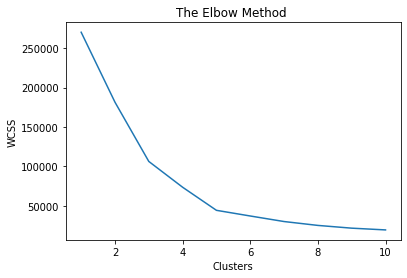

In [ ]:
from sklearn.cluster import KMeans

# We need to keep changing the number of clusters , so we would be using an iterative approach
# The loop would be based on the WCSS score, as it gets lower, we would be getting our clusters. 
wcss = []
for i in range(1,11):
  
  # initialization with kmeans++ avoids us to fall in the random intialization trap 
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title("The Elbow Method ")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

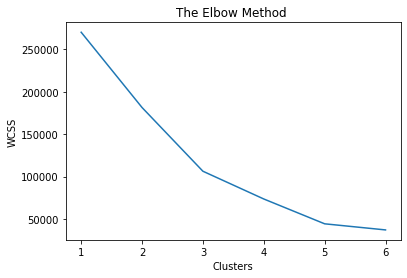

In [ ]:
# From above we identified that the elbow ( that is point where the graph becomes straight)
# To zoom the graph , we will try to lower the limit.
wcss_less = []
for i in range(1,7):
  
  # initialization with kmeans++ avoids us to fall in the random intialization trap 
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss_less.append(kmeans.inertia_)
plt.plot(range(1,7),wcss_less) 
plt.title("The Elbow Method ")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

## Training the kmeans model on the dataset

In [ ]:
# Now as we know our model is having optimal clusters as 5
# We will train our model 
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

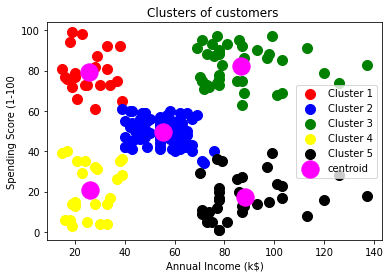

In [ ]:
# to select all the customers where y_means ==0 , 
# We are specifying the index of where y means == 0 or  1 or 2 or 3 or 4
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s =  300, c = 'magenta',label = 'centroid')
plt.title("Clusters of customers ")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.legend()
plt.show()